# Section 4 - Optimization and Gradients
## Notebook imports and packages

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - simple cost function

### $$f(x) = x^2 + x + 1$$

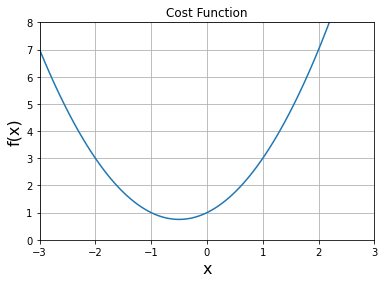

In [15]:
def f(x):
    return x**2 + x + 1

# Make some data
x_1 = np.linspace(start = - 3, stop = 3, num = 100)
#print(x_1[0:10])

plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_1, f(x_1))
plt.show()

## Slope and derivatives

In [16]:
def df(x):
    return 2*x + 1 # by power rule

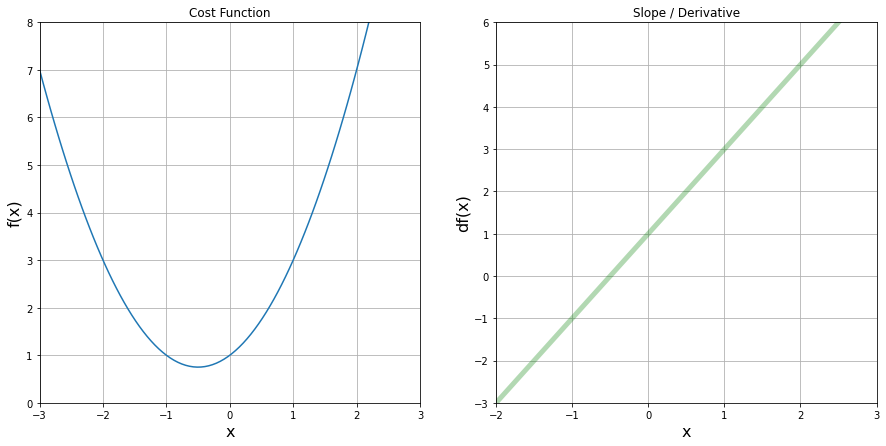

In [26]:
plt.figure(figsize = [15, 7])

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim([-3, 3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost Function')
plt.grid()
plt.plot(x_1, f(x_1))

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim([-2, 3])
plt.ylim(-3,6)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope / Derivative')
plt.grid()
plt.plot(x_1, df(x_1), color = "green", linewidth = 5, alpha = 0.3)

plt.show()